•Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import TextVectorization,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

# Problem Statement: 

Sumanth wants to build an flowers image classification CNN model which can take a flower image as input and prints the name of flower.

### Dataset Description:
The dataset consistof 3,700 photos of flowers.

The dataset contains five sub-directories, 

one per class:

•daisy

•dandelion

•roses

•sunflowers

•tulips
### Tasks to be performed:

•Import all the required libraries

•Download the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' using the Keras; and analyzing the images present in the dataset visualization

•Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio

•Plot a sample image attributed to each class name present in the original dataset.

•Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by deviding it with a number

•Build a sequential CNN model

•Compile the modeland print model summary

•Train and validate the model and plot the validation results using a line plot

•Feed the system with an image of a flower and print the prediction along with the accuracy

In [2]:
#•Download the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' 
#using the Keras; and analyzing the images present in the dataset visualization

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
data_dir = pathlib.Path(data_dir)

Total images: 3670


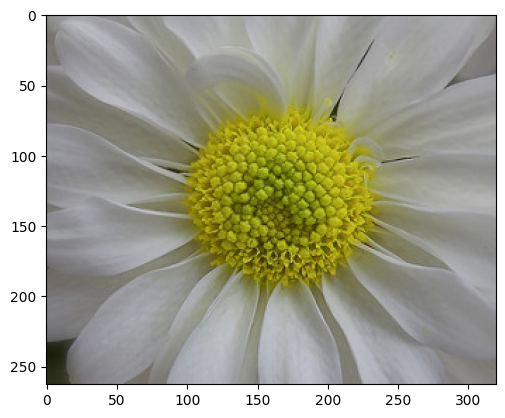

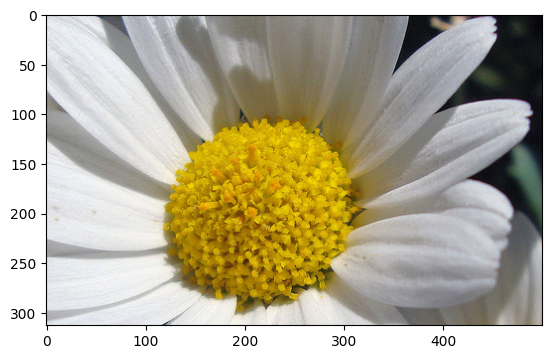

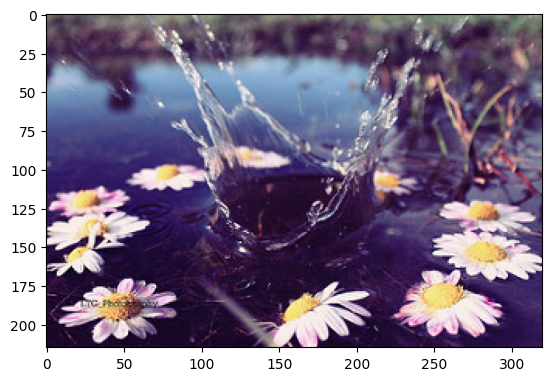

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"Total images: {image_count}")

flowers = list(data_dir.glob('daisy/*'))
for flower in flowers[:3]:
    img = plt.imread(str(flower))
    plt.imshow(img)
    plt.show()

In [5]:
#•Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio

In [6]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
#•Plot a sample image attributed to each class name present in the original dataset.

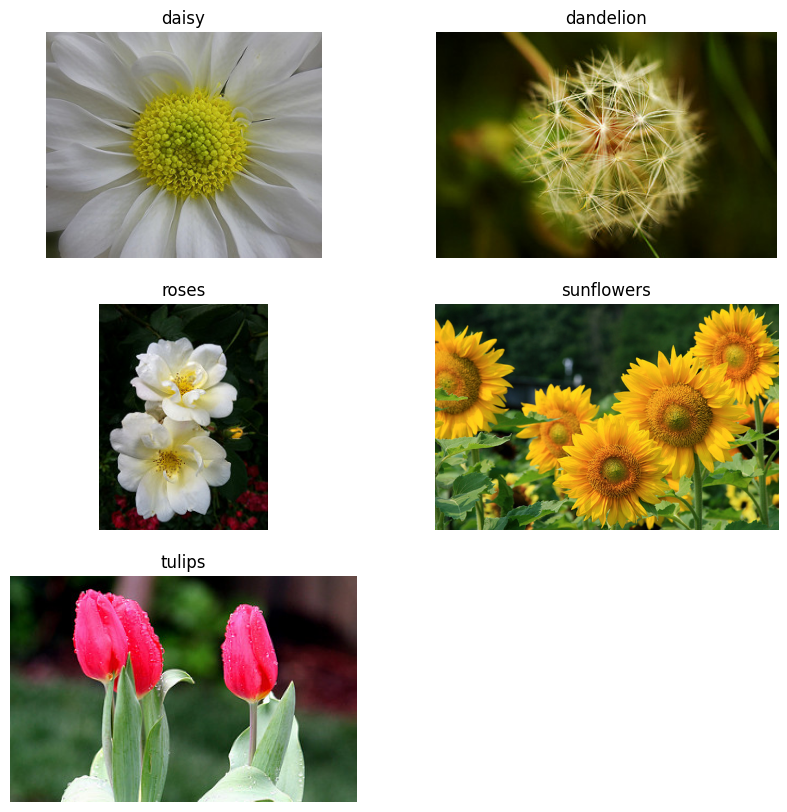

In [8]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    plt.subplot(3, 2, i+1)
    plt.title(class_names[i])
    plt.imshow(plt.imread(str(list(data_dir.glob(f'{class_names[i]}/*'))[0])))
    plt.axis('off')
plt.show()

In [9]:
#•Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by deviding it with a number

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

# Assuming train_ds and val_ds are your TensorFlow datasets

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [11]:
#•Build a sequential CNN model

In [12]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names))
])

C:\Users\ADMIN\miniconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
#•Compile the modeland print model summary

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#•Train and validate the model and plot the validation results using a line plot

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 0.3585 - loss: 1.4419 - val_accuracy: 0.5695 - val_loss: 1.0366
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.5899 - loss: 1.0196 - val_accuracy: 0.5531 - val_loss: 1.0342
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.6753 - loss: 0.8401 - val_accuracy: 0.6390 - val_loss: 0.9418
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.7428 - loss: 0.6721 - val_accuracy: 0.6744 - val_loss: 0.8674
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.8403 - loss: 0.4605 - val_accuracy: 0.6907 - val_loss: 0.8921
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.9005 - loss: 0.2911 - val_accuracy: 0.6567 - val_loss: 1.0649
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.9428 - loss: 0.1827 - val_accuracy: 0.6362 - val_loss: 1.5398
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.9661 - loss: 0.1209 - val_accu

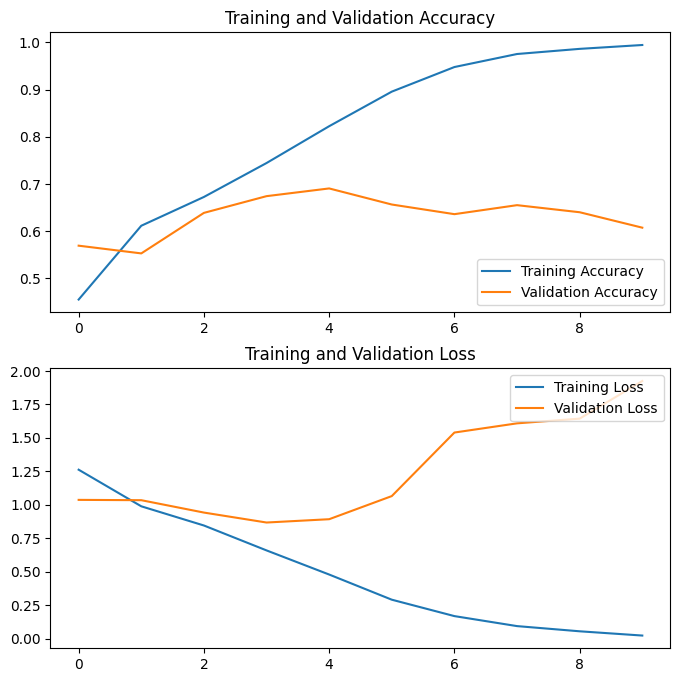

In [16]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#•Feed the system with an image of a flower and print the prediction along with the accuracy

In [18]:
img_path = "C:\\Users\\ADMIN\\Downloads\\flowerpng.png"
img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
This image most likely belongs to roses with a 100.00 percent confidence.


In [19]:
import gradio as gr

# Define your model and class_names
num_classes = 5
img_height, img_width = 180, 180

def img(please_choose_flower_img):
    # Resize the input image to match the expected input shape of the model
    img_resized = tf.image.resize(please_choose_flower_img, (img_height, img_width))
    img_resized = tf.expand_dims(img_resized, axis=0)  # Add batch dimension
    img_rescaled = img_resized / 255.0  # Rescale pixel values to [0, 1]

    # Make prediction
    predictions = model.predict(img_rescaled)
    score = tf.nn.softmax(predictions[0])

    # Get the predicted class label and confidence score
    predicted_class = np.argmax(score)
    confidence_score = 100 * np.max(score)

    return f"This image most likely belongs to {class_names[predicted_class]} with a {confidence_score:.2f} percent confidence."

# Define the interface
demo = gr.Interface(fn=img, inputs="image", outputs="text")

# Launch the interface
if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
